In [1]:
from kitaev import *

hi


In [2]:
N = 1000
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
G_0_odd = []
G_0_even = []
G_pi_odd = []
G_pi_even = []

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd.append((G_0_pos - G_0_neg)/2)
    G_0_even.append((G_0_pos + G_0_neg)/2)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd.append((G_pi_pos - G_pi_neg)/2)
    G_pi_even.append((G_pi_pos + G_pi_neg)/2)

 10%|█         | 10/100 [05:27<49:08, 32.76s/it]


KeyboardInterrupt: 

In [3]:
"""G_0_odd = np.array(G_0_odd)
G_0_even = np.array(G_0_even)
G_pi_odd = np.array(G_pi_odd)
G_pi_even = np.array(G_pi_even)
"""
f_0_odd = [(G_0_odd[i][0,1]) for i in range(len(G_0_odd))]
f_0_even = [(G_0_even[i][0,1]) for i in range(len(G_0_even))]
f_pi_odd = [(G_pi_odd[i][0,1]) for i in range(len(G_pi_odd))]
f_pi_even = [(G_pi_even[i][0,1]) for i in range(len(G_pi_even))]
print(len(G_0_odd))

10


ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

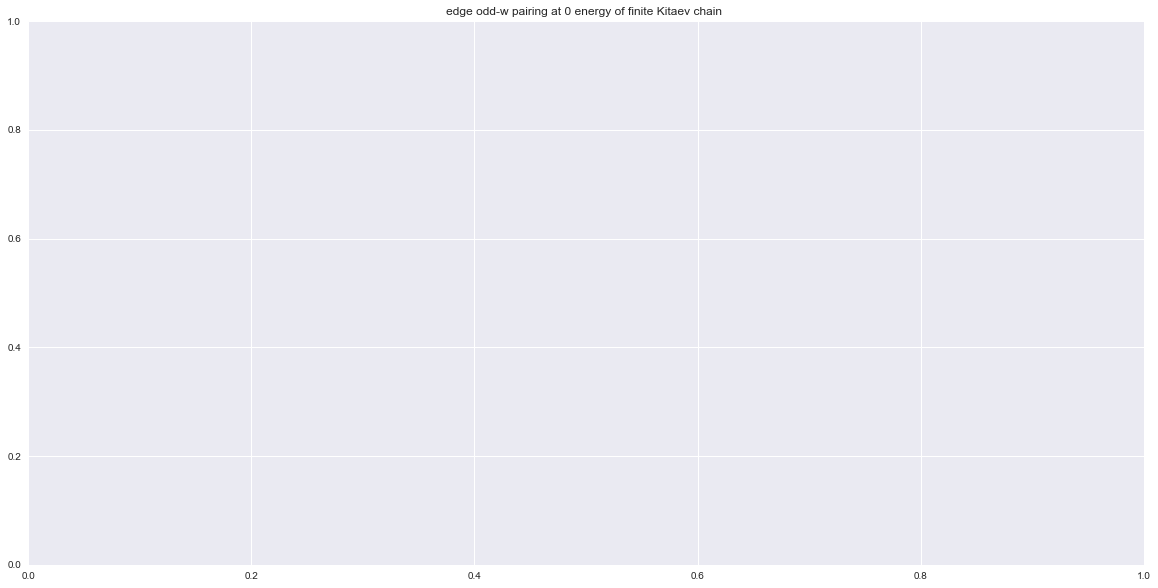

In [4]:
plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,f_0_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,f_0_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_pi_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge odd-w/even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,[f_0_odd[i]/f_0_even[i] for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge odd-w/even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,[f_pi_odd[i]/f_pi_even[i] for i in range(len(f_0_odd))])


plt.ylabel('ratio: odd/even')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
N = 1000
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
d, V= np.linalg.eig(U)
np.isclose( np.diag(d) ,V.conj().T @ U @ V)

In [ ]:
N = 1000
d =2
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
U = one_period_propagator([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)
eval, evec= la.eig(U)
h_f1 =evec @ np.diag(np.log(eval)*1j/np.pi) @ la.inv(evec)
#np.isclose( np.diag(d) ,V.conj().T @ U @ V)

In [ ]:
h_f2 = floquet_hamiltonian([h_1.lattice_hamiltonian(),h_2.lattice_hamiltonian()],0.5)

In [ ]:
np.testing.assert_allclose(h_f1,h_f2,atol=1e-8,rtol=1e-5)


In [ ]:
np.isclose(h_f1,h_f2)